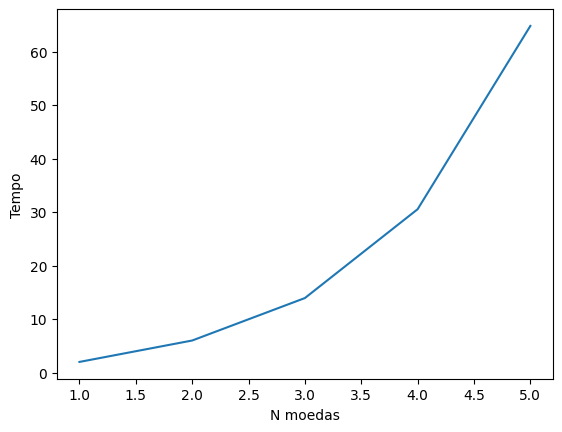

In [20]:
# 1)

import numpy as np
import matplotlib.pyplot as plt

def simulate(N: int) -> int:
    consecutive_heads = 0
    steps = 0

    while True:
        steps += 1
        toss = np.random.randint(0, 2)
        consecutive_heads = consecutive_heads + 1 if toss == 1 else 0

        if consecutive_heads == N:
            break

    return steps

def monte_carlo():
    times = 1_000
    N = 6
    x = []
    y = []

    for i in range(1, N):
        acc = 0
        x.append(i)

        for j in range(times):
            acc += simulate(i)
        
        y.append(acc / times)

    plt.xlabel('N moedas')
    plt.ylabel('Tempo')
    plt.plot(x, y)

monte_carlo()


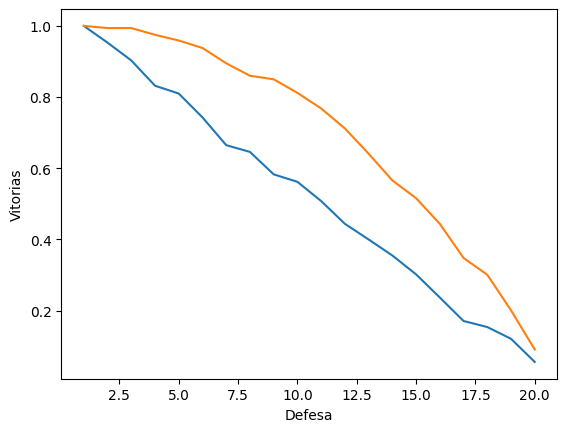

In [1]:
# 2)

import numpy as np
import matplotlib.pyplot as plt

def attack(defense: int, advantage: bool) -> bool:
    atk1 = np.random.randint(1, 21)
    if not advantage:
        return atk1 >= defense

    atk2 = np.random.randint(1, 21)
    real_atk = max(atk1, atk2)

    return real_atk >= defense


def monte_carlo(has_advantage: True):
    times = 1000
    x = []
    y = []

    for D in range(1, 21):
        acc = 0
        x.append(D)
        for i in range(times):
            if attack(D, has_advantage):
                acc += 1
        y.append(acc / times)

    plt.xlabel('Defesa')
    plt.ylabel('Vitorias')
    plt.plot(x, y)

monte_carlo(False)
monte_carlo(True)


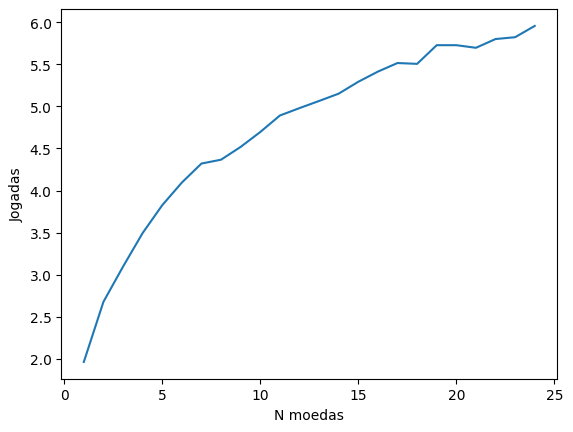

In [3]:
# 3)

import numpy as np
import matplotlib.pyplot as plt

def toss_n_coins(start: int):
    faces = ['H', 'T']
    n = start
    steps = 0

    while True:
        steps += 1
        coins = [np.random.choice(faces) for _ in range(n)]
        n = coins.count('T')

        if n == 0:
            break

    return steps

def monte_carlo():
    times = 1000
    x = []
    y = []

    for n in range(1, 25):
        acc = 0
        for i in range(times):
            acc += toss_n_coins(n)
        x.append(n)
        y.append(acc / times)
    
    plt.xlabel('N moedas')
    plt.ylabel('Jogadas')
    plt.plot(x, y)
        
monte_carlo()

In [79]:
# 4)

import numpy as np
import matplotlib.pyplot as plt

def both_male() -> bool:
    first = np.random.choice(['M', 'F'])
    if first == 'F':
        return False

    second = np.random.choice(['M', 'F'])
    if second == 'M':
        return True
    
    return False

def monte_carlo() -> float:
    times = 1_000
    acc = 0

    for i in range(1, times + 1):
        if both_male():
            acc += 1

    return acc / times

print(f'A chance calculada do fenômeno é de {monte_carlo()}')

A chance calculada do fenômeno é de 0.239


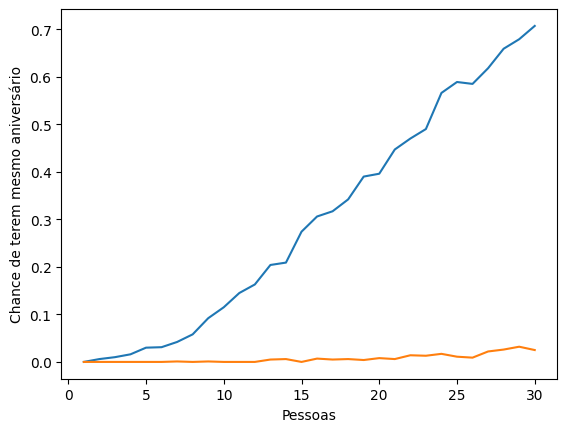

In [83]:
# 5)

import numpy as np
import matplotlib.pyplot as plt

def birthday_paradox(n: int, same_birthday: int) -> bool:
    coincidences = [0 for _ in range(366)]
    birthdays = [np.random.randint(1, 366) for _ in range(n)]

    for birthday in birthdays:
        occurrences = coincidences[birthday]
        coincidences[birthday] = occurrences + 1

        if coincidences[birthday] == same_birthday:
            return True

    return False

def monte_carlo(same_birthday: int):
    times = 1_000
    x = []
    y = []

    for n in range(1, 31):
        acc = 0
        for i in range(1, times + 1):
            if birthday_paradox(n, same_birthday):
                acc += 1
        x.append(n)
        y.append(acc / times)

    plt.xlabel('Pessoas')
    plt.ylabel('Chance de terem mesmo aniversário')
    plt.plot(x, y)

monte_carlo(2)
monte_carlo(3)

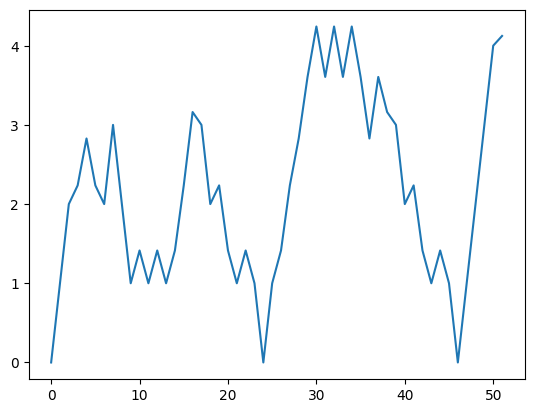

In [129]:
# 6)
# a)

import math
import numpy as np
import matplotlib.pyplot as plt

def walk(direction: str, point: tuple[int, int]) -> tuple[int, int]:
    if direction == 'N':
        return (point[0], point[1] + 1)
    
    if direction == 'S':
        return (point[0], point[1] - 1)
    
    if direction == 'E':
        return (point[0] + 1, point[1])
    
    return (point[0] - 1, point[1])

def distance(p1: tuple[int, int], p2: tuple[int, int]) -> float:
    return math.sqrt(((p1[0] - p2[0]) ** 2) + ((p1[1] - p2[1]) ** 2))

def random_walk_to_goal():
    steps = 0
    start = (0, 0)
    current = (0, 0)
    directions = ['N', 'S', 'E', 'W']

    x = []
    y = []

    while (dist := distance(start, current)) <= 5:
        x.append(steps)
        y.append(dist)
        steps += 1

        direction = np.random.choice(directions)
        current = walk(direction, current)

    plt.plot(x, y)

random_walk_to_goal()

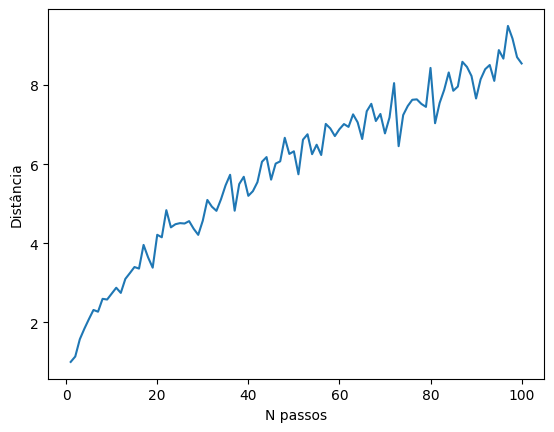

In [4]:
# 6)
# b)

import math
import numpy as np
import matplotlib.pyplot as plt

def walk(direction: str, point: tuple[int, int]) -> tuple[int, int]:
    if direction == 'N':
        return (point[0], point[1] + 1)
    
    if direction == 'S':
        return (point[0], point[1] - 1)
    
    if direction == 'E':
        return (point[0] + 1, point[1])
    
    return (point[0] - 1, point[1])

def distance(p1: tuple[int, int], p2: tuple[int, int]) -> float:
    return math.sqrt(((p1[0] - p2[0]) ** 2) + ((p1[1] - p2[1]) ** 2))

def random_walk(limit: int) -> float:
    steps = 0
    start = (0, 0)
    current = (0, 0)
    directions = ['N', 'S', 'E', 'W']

    while steps < limit:
        steps += 1
        direction = np.random.choice(directions)
        current = walk(direction, current)

    return distance(current, start)

def monte_carlo(limit: int) -> float:
    times = 100
    acc = 0

    for _ in range(times):
        acc += random_walk(limit)

    return acc / times

x = list(range(1, 101))
y = [monte_carlo(i) for i in range(1, 101)]

plt.xlabel('N passos')
plt.ylabel('Distância')
plt.plot(x, y)

In [43]:
# 7)
# A)

import numpy as np

countries = ['BR', 'UR', 'AR', 'PR', 'BO', 'CH', 'PR', 'EC', 'CO', 'VE', 'GU', 'SU', 'GF']
south_america = {
    'BR': ['UR', 'AR', 'PA', 'BO', 'PR', 'CO', 'VE', 'GU', 'SU', 'GF'],
    'UR': ['BR', 'AR'],
    'AR': ['CH', 'UR', 'PA', 'BR'],
    'PA': ['BR', 'AR', 'BO'],
    'BO': ['BR', 'AR', 'PA', 'PR', 'CH'],
    'CH': ['PR', 'BO', 'AR'],
    'PR': ['CH', 'BO', 'BR', 'EC', 'CO'],
    'EC': ['PR', 'CO'],
    'CO': ['EC', 'PR', 'BR', 'VE'],
    'VE': ['CO', 'BR', 'GU'],
    'GU': ['VE', 'BR', 'SU'],
    'SU': ['GU', 'BR', 'GF'],
    'GF': ['SU', 'BR'],
}

def still_in_brazil() -> bool:
    current = np.random.choice(countries)
    limit = 20
    step = 0

    while step < limit:
        step += 1
        current = np.random.choice(south_america[current])

    return current == 'BR'

def monte_carlo() -> float:
    times = 1_000
    acc = 0

    for _ in range(times):
        if still_in_brazil():
            acc += 1

    return acc / times

print(f'Após 20 passos, a chance do turista estar no Brasil é de {monte_carlo()}')

Após 20 passos, a chance do turista estar no Brasil é de 0.219


In [52]:
# 7)
# B)

import numpy as np

countries = ['BR', 'UR', 'AR', 'PR', 'BO', 'CH', 'PR', 'EC', 'CO', 'VE', 'GU', 'SU', 'GF']
south_america = {
    'BR': ['UR', 'AR', 'PA', 'BO', 'PR', 'CO', 'VE', 'GU', 'SU', 'GF'],
    'UR': ['BR', 'AR'],
    'AR': ['CH', 'UR', 'PA', 'BR'],
    'PA': ['BR', 'AR', 'BO'],
    'BO': ['BR', 'AR', 'PA', 'PR', 'CH'],
    'CH': ['PR', 'BO', 'AR'],
    'PR': ['CH', 'BO', 'BR', 'EC', 'CO'],
    'EC': ['PR', 'CO'],
    'CO': ['EC', 'PR', 'BR', 'VE'],
    'VE': ['CO', 'BR', 'GU'],
    'GU': ['VE', 'BR', 'SU'],
    'SU': ['GU', 'BR', 'GF'],
    'GF': ['SU', 'BR'],
}

def visit_all_countries() -> int:
    steps = 0
    current = np.random.choice(countries)
    visited_countries = set()

    while len(visited_countries) != len(countries):
        visited_countries.add(current)
        current = np.random.choice(south_america[current])
        steps += 1

    return steps

def monte_carlo() -> float:
    times = 1_000
    acc = 0

    for _ in range(times):
        acc += visit_all_countries()

    return acc / times

print(f'Para visitar todos os países é necessário, em média, {monte_carlo()} passos')

Para visitar todos os países é necessário, em média, 63.765 passos


In [58]:
# 7)
# C)

import numpy as np

countries = ['BR', 'UR', 'AR', 'PR', 'BO', 'CH', 'PR', 'EC', 'CO', 'VE', 'GU', 'SU', 'GF']
south_america = {
    'BR': ['UR', 'AR', 'PA', 'BO', 'PR', 'CO', 'VE', 'GU', 'SU', 'GF'],
    'UR': ['BR', 'AR'],
    'AR': ['CH', 'UR', 'PA', 'BR'],
    'PA': ['BR', 'AR', 'BO'],
    'BO': ['BR', 'AR', 'PA', 'PR', 'CH'],
    'CH': ['PR', 'BO', 'AR'],
    'PR': ['CH', 'BO', 'BR', 'EC', 'CO'],
    'EC': ['PR', 'CO'],
    'CO': ['EC', 'PR', 'BR', 'VE'],
    'VE': ['CO', 'BR', 'GU'],
    'GU': ['VE', 'BR', 'SU'],
    'SU': ['GU', 'BR', 'GF'],
    'GF': ['SU', 'BR'],
}

def still_in_brazil(n: int) -> bool:
    current = 'BR'
    step = 0

    while step < n:
        step += 1
        current = np.random.choice(south_america[current])

    return current == 'BR'

def monte_carlo(n: int) -> float:
    times = 1_000
    acc = 0

    for _ in range(times):
        if still_in_brazil(n):
            acc += 1

    return acc / times

chance = monte_carlo(2) + monte_carlo(3) + monte_carlo(4)
print(f'A chance do turista ainda estar no Brazil após 2, 3 ou 4 passos é: {chance}')


A chance do turista ainda estar no Brazil após 2, 3 ou 4 passos é: 0.7


In [77]:
# 7)
# D)

import numpy as np

countries = ['BR', 'UR', 'AR', 'PR', 'BO', 'CH', 'PR', 'EC', 'CO', 'VE', 'GU', 'SU', 'GF']
south_america = {
    'BR': ['UR', 'AR', 'PA', 'BO', 'PR', 'CO', 'VE', 'GU', 'SU', 'GF'],
    'UR': ['BR', 'AR'],
    'AR': ['CH', 'UR', 'PA', 'BR'],
    'PA': ['BR', 'AR', 'BO'],
    'BO': ['BR', 'AR', 'PA', 'PR', 'CH'],
    'CH': ['PR', 'BO', 'AR'],
    'PR': ['CH', 'BO', 'BR', 'EC', 'CO'],
    'EC': ['PR', 'CO'],
    'CO': ['EC', 'PR', 'BR', 'VE'],
    'VE': ['CO', 'BR', 'GU'],
    'GU': ['VE', 'BR', 'SU'],
    'SU': ['GU', 'BR', 'GF'],
    'GF': ['SU', 'BR'],
}

def no_chile():
    steps = 0
    current = 'BR'
    visited_countries = set()

    while steps < 10:
        visited_countries.add(current)
        current = np.random.choice(south_america[current])
        steps += 1

    return 'CH' not in visited_countries

def monte_carlo() -> float:
    times = 1_000
    acc = 0

    for _ in range(times):
        acc += no_chile()

    return acc / times

print(f'Após 10 passos começando pelo Brasil, a chance do turista NÃO passar pelo Chile é de {monte_carlo()}')

Após 10 passos começando pelo Brasil, a chance do turista NÃO passar pelo Chile é de 0.648


In [4]:
# 8)
# A)

import numpy as np
from typing import List


def d6() -> int:
    return np.random.randint(1, 7)

def run_game() -> List[float]:
    board = ([0] * 10) * 4
    board_size = len(board)
    limit = 10_000
    pos = 0

    for _ in range(limit):
        steps = d6() + d6()
        pos = (pos + steps) % board_size

        board[pos] += 1

    return np.array(board) / limit

print(run_game())

[0.0261 0.026  0.0253 0.0227 0.0271 0.0273 0.0256 0.0256 0.0243 0.0257
 0.0254 0.0223 0.0254 0.0236 0.0257 0.0281 0.0251 0.0232 0.0237 0.0256
 0.0259 0.0236 0.0232 0.0274 0.0251 0.0246 0.0271 0.024  0.0232 0.0245
 0.0222 0.0254 0.0257 0.0244 0.026  0.0268 0.0254 0.0232 0.0246 0.0239]


In [6]:
# 8)
# B)

import numpy as np
from typing import List


def d6() -> int:
    return np.random.randint(1, 7)

def run_game() -> List[float]:
    board = ([0] * 10) * 4
    board_size = len(board)
    limit = 10_000
    pos = 0

    prison_position = 19
    prison_location = 39

    for _ in range(limit):
        steps = d6() + d6()
        pos = (pos + steps) % board_size

        if pos == prison_position:
            pos = prison_location

        board[pos] += 1

    return np.array(board) / limit

print(run_game())


[0.0231 0.0233 0.0258 0.025  0.0276 0.0277 0.0252 0.0282 0.0288 0.0263
 0.0255 0.0269 0.0265 0.0269 0.0278 0.0272 0.0275 0.0279 0.0274 0.
 0.0284 0.0234 0.025  0.0249 0.0241 0.0232 0.0235 0.0205 0.0227 0.0222
 0.0241 0.0209 0.0253 0.0223 0.0229 0.0243 0.0224 0.0236 0.0197 0.052 ]


# 8)
## C)

Considerando que na resposta anterior cada 10 casas representa um lado do tabuleiro, as casas após a prisão (terceira lista) tiveram um leve aumento na chance de parar.